In [1]:
import pandas as pd
from sklearn import tree
training = pd.read_csv('Datasets/titanic-train.csv')

In [2]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
training.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
training['Sex'] = training['Sex'].apply(lambda x: 0 if x == 'male' else 1)

In [5]:
training['Age'].fillna(training['Age'].mean(), inplace=True)

In [6]:
training['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [7]:
training['Age'].mean()

29.699117647058763

In [8]:
training['Age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64

In [9]:
y_target = training['Survived'].values

In [10]:
columns = ['Fare', 'Pclass', 'Sex', 'Age', 'SibSp']
X_input = training[columns].values

In [11]:
clf_train = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf_train = clf_train.fit(X_input, y_target)

In [12]:
clf_train.score(X_input, y_target)

0.8226711560044894

In [16]:
from six import StringIO
with open('Datasets/titanic.dot', 'w') as f:
    f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns)

In [17]:
!dot -Tpng Datasets/titanic.dot -o titanic.png

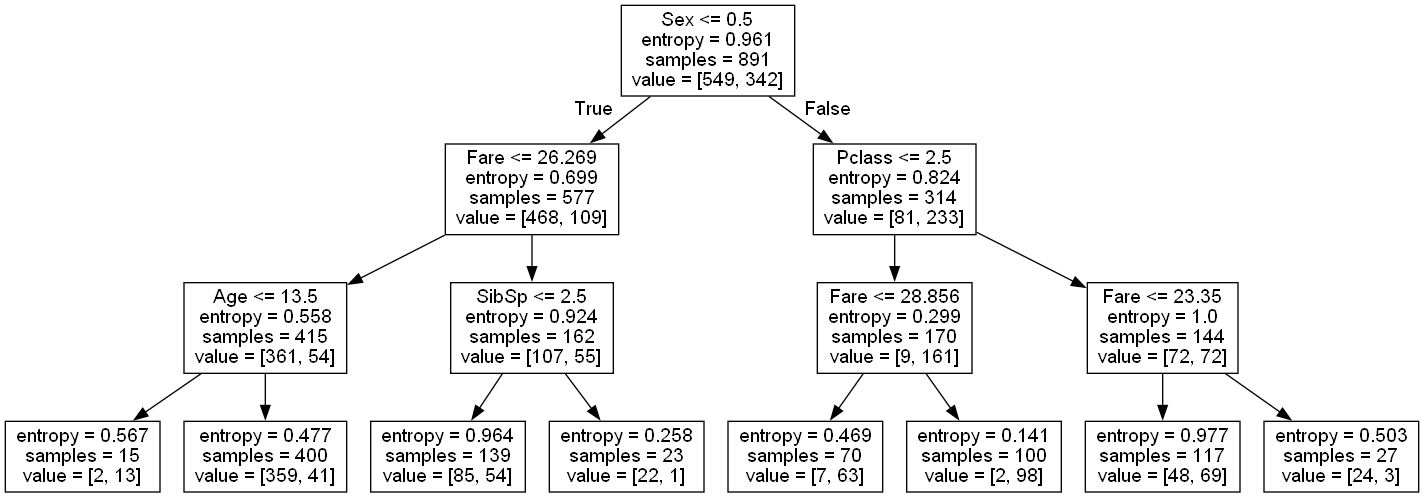

In [18]:
from IPython.display import Image
Image('titanic.png')

In [19]:
testing = pd.read_csv('Datasets/titanic-test.csv')

In [20]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [22]:
testing['Sex'] = testing['Sex'].apply(lambda x: 0 if x == 'male' else 1)
testing['Age'].fillna(testing['Age'].mean(), inplace=True)

In [28]:
testing['Fare'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 418 entries, 0 to 417
Series name: Fare
Non-Null Count  Dtype  
--------------  -----  
417 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


In [30]:
testing['Fare'].fillna(testing['Fare'].mean(), inplace=True)

In [32]:
tx_input = testing[columns].values

In [61]:
target_labels = clf_train.predict(tx_input)
target_labels = pd.DataFrame({'Est_Survival': target_labels, 'Name': testing['Name']})

In [82]:
import numpy as np
all_data = pd.read_csv('Datasets/titanic-all.csv')
testing_results = pd.merge(target_labels, all_data[['Name', 'Survived']], on=['Name'])

In [81]:
all_data.to_csv('Datasets/titanic-all.csv')

In [83]:
testing_results

,Est_Survival,Name,Survived
0,0,"Kelly, Mr. James",0.0
1,0,"Kelly, Mr. James",0.0
2,1,"Wilkes, Mrs. James (Ellen Needs)",1.0
3,0,"Myles, Mr. Thomas Francis",0.0
4,0,"Wirz, Mr. Albert",0.0
...,...,...,...
393,0,"Spector, Mr. Woolf",0.0
394,1,"Oliva y Ocana, Dona. Fermina",1.0
395,0,"Saether, Mr. Simon Sivertsen",0.0
396,0,"Ware, Mr. Frederick",0.0


In [84]:
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) / float(len(testing_results))

In [90]:
acc

0.7688442211055276

In [146]:
all_data = pd.read_csv('Datasets/titanic-all.csv', usecols=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare'])

In [148]:
all_data['Sex'] = all_data['Sex'].apply(lambda x: 0 if x == 'male' else 1)
all_data['Age'].fillna(all_data['Age'].mean(), inplace=True)

In [150]:
all_data = all_data.dropna()

In [151]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1308 non-null   float64
 1   Survived  1308 non-null   float64
 2   Sex       1308 non-null   int64  
 3   Age       1308 non-null   float64
 4   SibSp     1308 non-null   float64
 5   Fare      1308 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 71.5 KB


In [152]:
from sklearn.model_selection import train_test_split

x = all_data[columns].values
y = all_data['Survived'].values

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.4, random_state=0)

In [153]:
clf_train = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf_train = clf_train.fit(X_train, Y_train)

In [154]:
train_score = str(clf_train.score(X_train, Y_train))
test_score = str(clf_train.score(X_test, Y_test))
print(f'Training score = {train_score}\nTesting score = {test_score}')

Training score = 0.8201530612244898
Testing score = 0.8053435114503816
